In [101]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train_numeric = train._get_numeric_data()
test_numeric = test._get_numeric_data()

dropped_cols = ['Id', 'SalePrice']

X_train = train_numeric.drop(dropped_cols, 1)
y_train = train_numeric['SalePrice']

# print(train_numeric.info())
# print(train_numeric['SalePrice'])
print(y_train)


0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000
1443    121000
1444    179600
1445    129000
1446    157900
1447    240000
1448    112000
1449     92000
1450    136000
1451    287090
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, dtype: int64


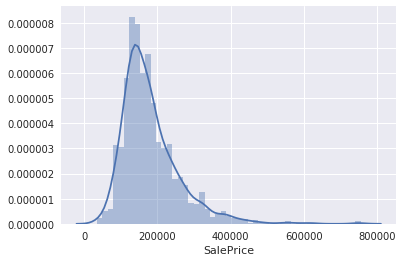

In [102]:
import seaborn as sns
sns.distplot(train['SalePrice']);

In [103]:
print(train['SalePrice'].skew())
print(train['SalePrice'].kurt())



1.8828757597682129
6.536281860064529


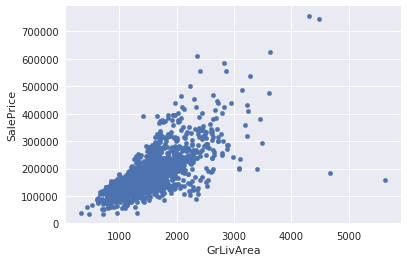

In [104]:
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

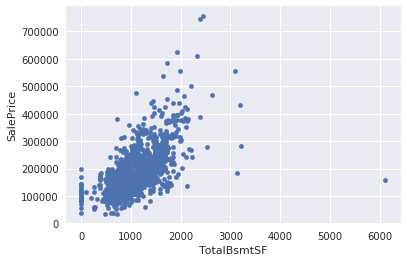

In [105]:
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

(-0.5, 9.5, 0, 800000)

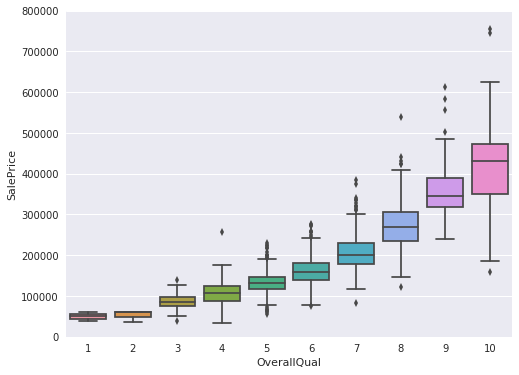

In [106]:
import matplotlib.pyplot as plt

var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis = 1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

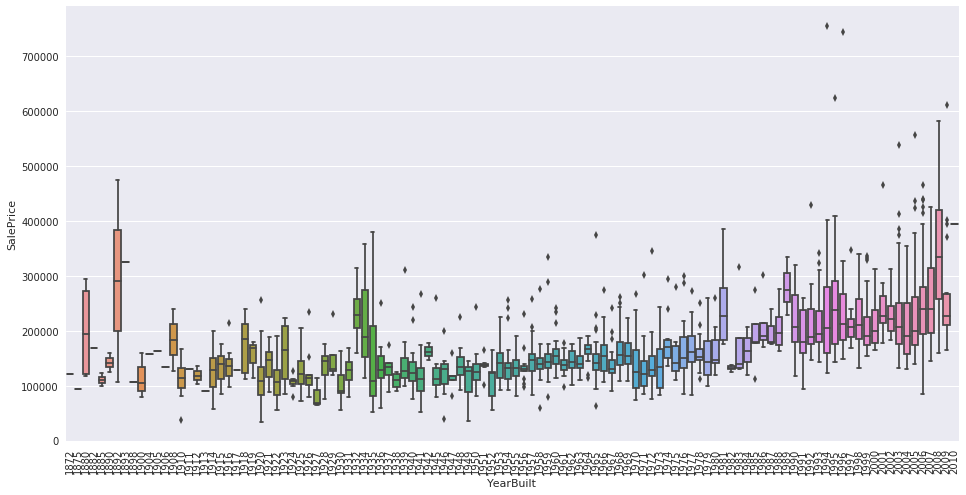

In [107]:
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis = 1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
plt.xticks(rotation=90)

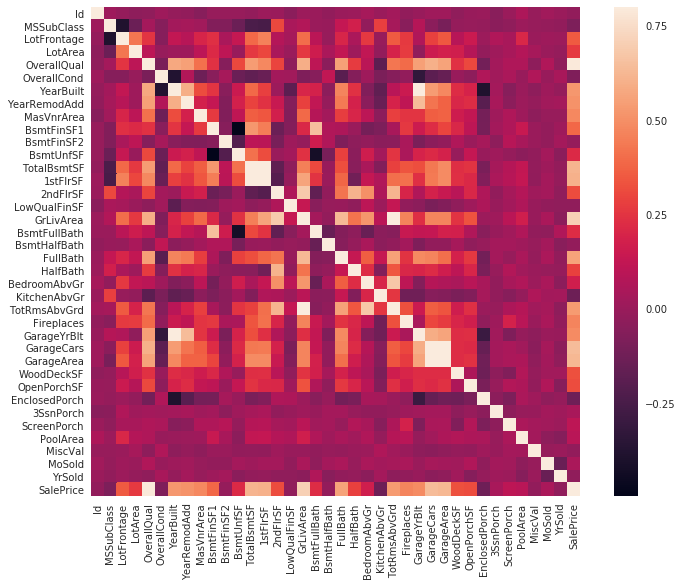

In [108]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

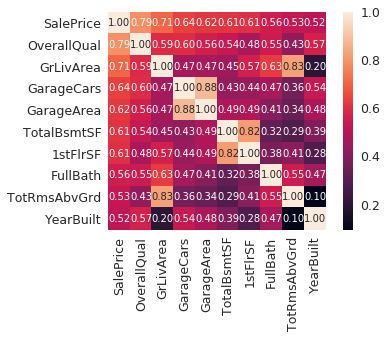

In [109]:
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

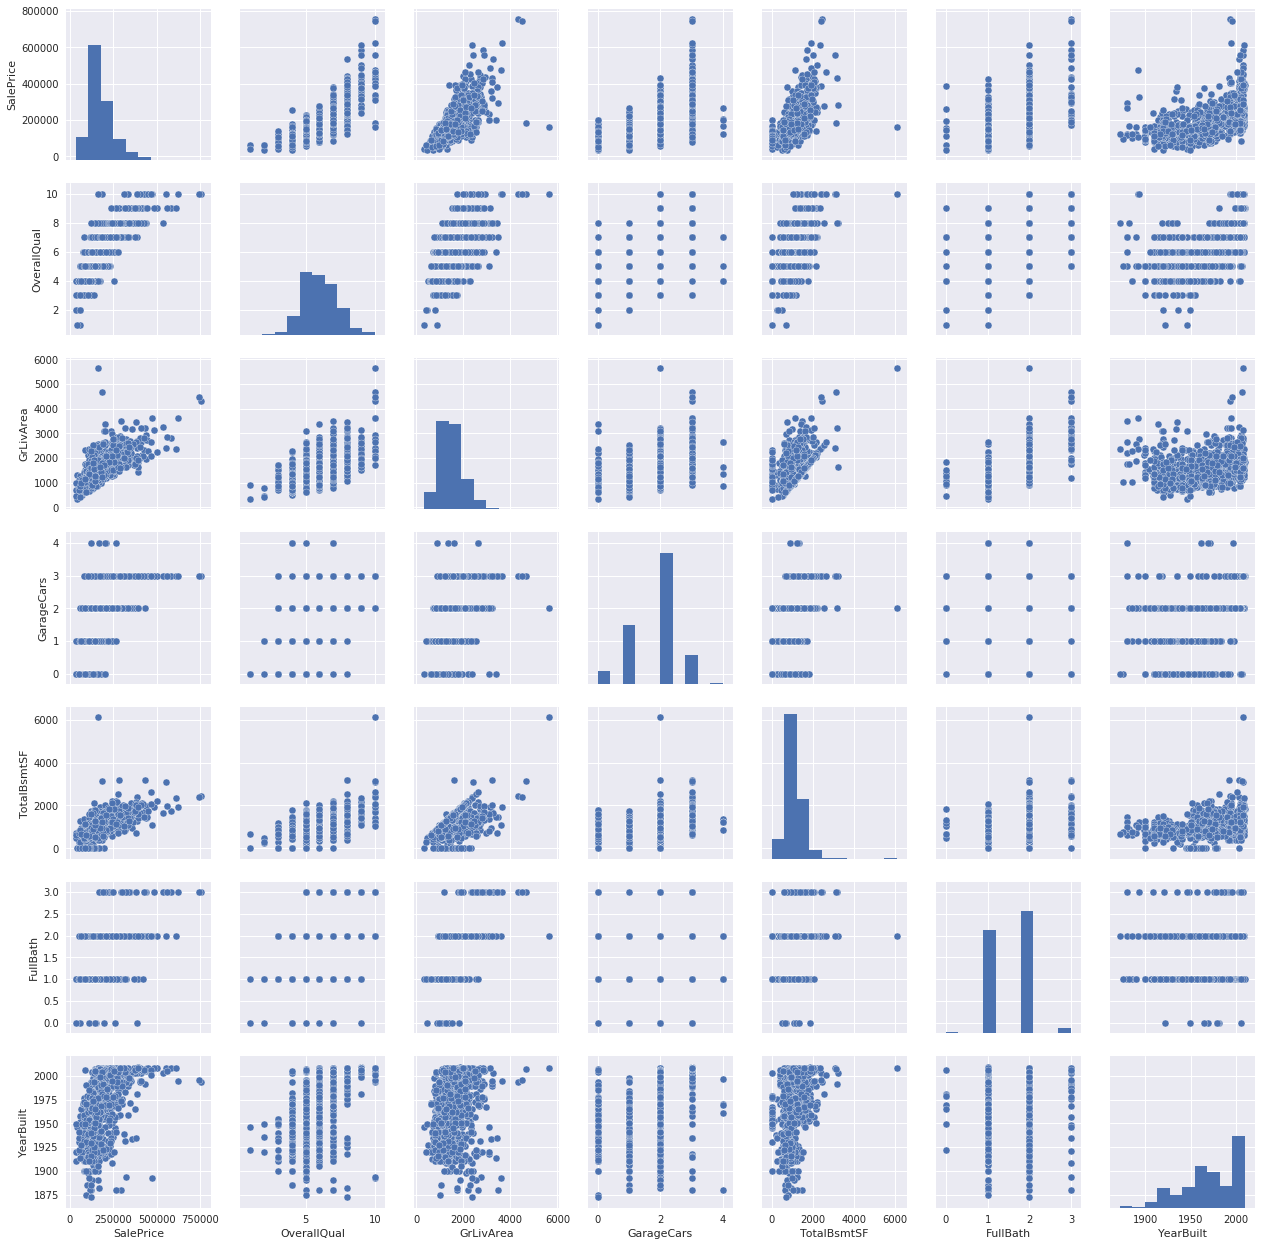

In [110]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size=2.5)
plt.show()

In [111]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [112]:
train = train.drop((missing[missing['Total']>1]).index,1)
train = train.drop(train.loc[train['Electrical'].isnull()].index)
train.isnull().sum().max()

0

In [113]:
from sklearn.preprocessing import StandardScaler
salesprice_scaled = StandardScaler().fit_transform(train['SalePrice'][:,np.newaxis])
low_range = salesprice_scaled[salesprice_scaled[:,0].argsort()][:10]
high_range = salesprice_scaled[salesprice_scaled[:,0].argsort()][-10:]

print(low_range)
print(high_range)

[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


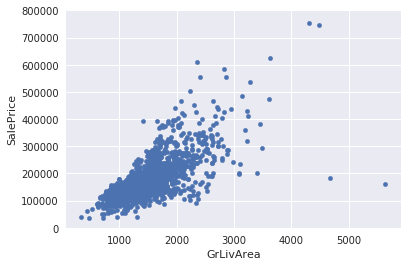

In [114]:
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

In [115]:
train.sort_values(by = var, ascending = False)[:2]
train = train.drop(train[train['Id'] == 1299].index)
train = train.drop(train[train['Id'] == 524].index)

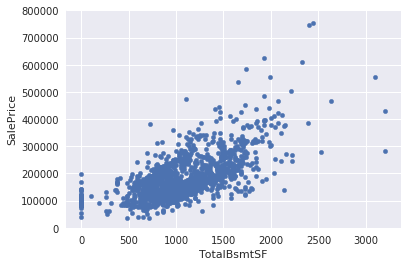

In [116]:
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

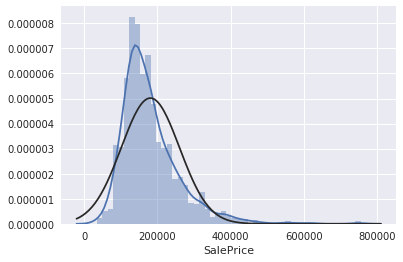

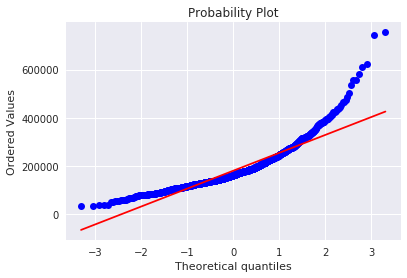

In [117]:
from scipy.stats import norm
from scipy import stats

sns.distplot(train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

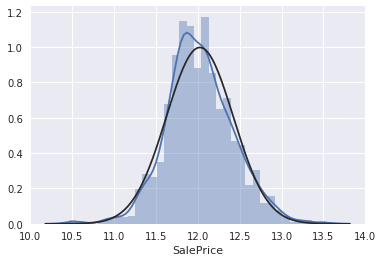

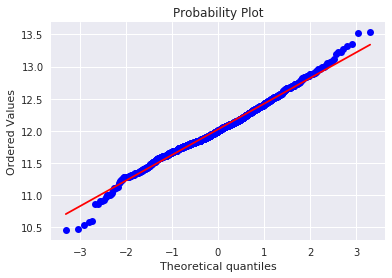

In [118]:
sale_price_col = 'SalePrice'
train[sale_price_col] = np.log(train[sale_price_col])
sns.distplot(train[sale_price_col], fit=norm)
fig = plt.figure()
res = stats.probplot(train[sale_price_col], plot=plt)

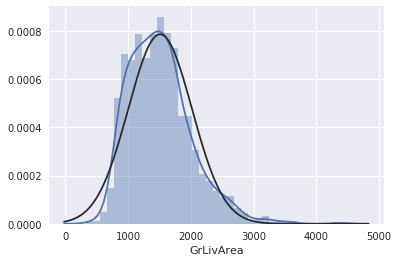

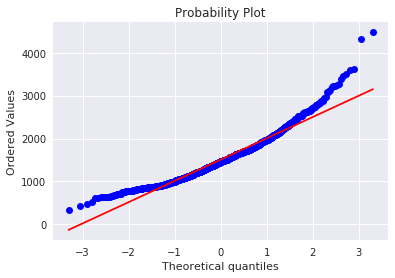

In [119]:
sns.distplot(train['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

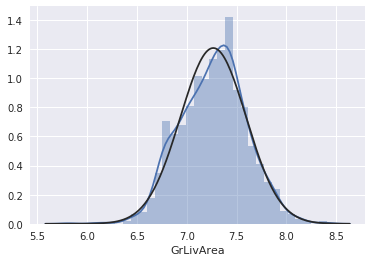

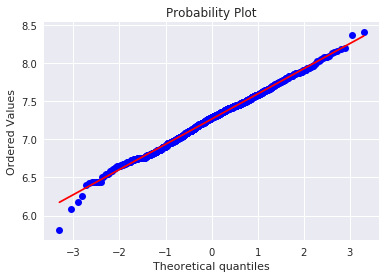

In [120]:
gr_living_area_col = 'GrLivArea'
train[gr_living_area_col] = np.log(train[gr_living_area_col])
sns.distplot(train[gr_living_area_col], fit=norm)
fig = plt.figure()
res = stats.probplot(train[gr_living_area_col], plot=plt)

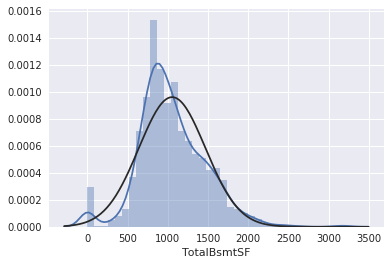

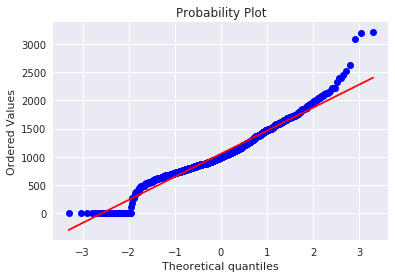

In [121]:
total_bsmt_sf_col = 'TotalBsmtSF'
sns.distplot(train[total_bsmt_sf_col], fit=norm)
fig = plt.figure()
res = stats.probplot(train[total_bsmt_sf_col], plot=plt)

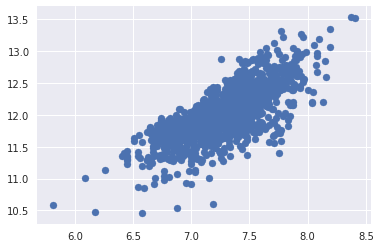

In [122]:
plt.scatter(train[gr_living_area_col], train[sale_price_col])